# Importing the required libraries

In [3]:
import numpy as np
import os
from matplotlib import pyplot as plt
import random
from PIL import Image
import shutil

# Data Collection
The dataset is take from - http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

# Displaying all the names food categories

In [4]:
dataset_dir = r"C:\Users\vemul\Desktop\VINTERN\data\train"

for image_class in os.listdir(dataset_dir): 
    print(image_class)

Fire
No Fire


In [5]:
dir_list = os.listdir(dataset_dir)
print(len(dir_list))

2


# Displaying 5 random images from each class

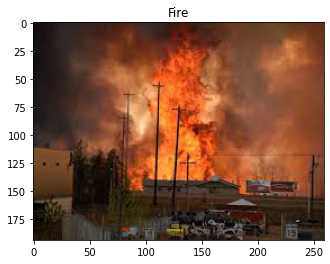

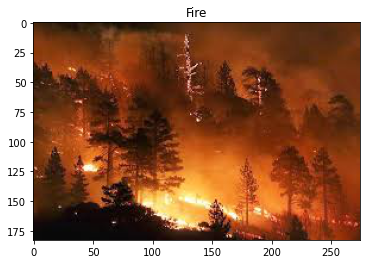

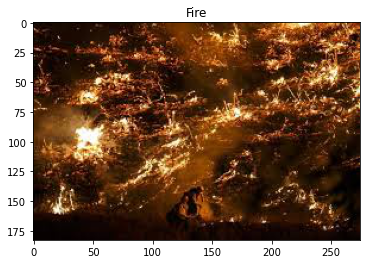

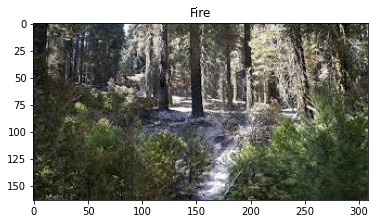

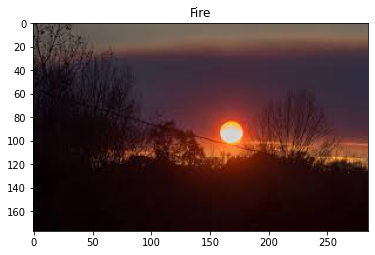

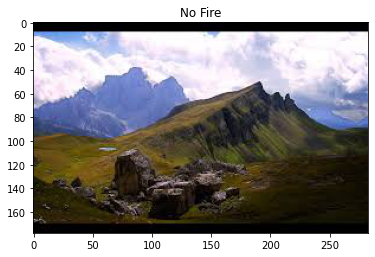

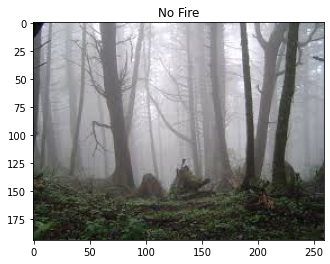

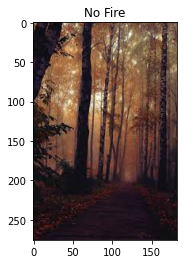

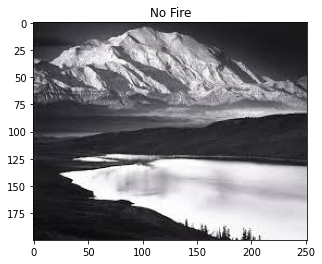

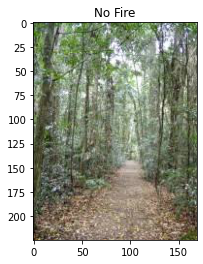

In [6]:
# Path to the dataset directory
dataset_dir = r"C:\Users\vemul\Desktop\VINTERN\data\train"

# Number of images to display per class
num_images_per_class = 5

# Get a list of all class directories in the dataset
class_dirs = os.listdir(dataset_dir)

# Loop over each class directory and display a random sample of images
for class_dir in class_dirs:
    # Get a list of all image files in the class directory
    image_files = os.listdir(os.path.join(dataset_dir, class_dir))

    # Choose a random sample of images from the class
    sample_images = random.sample(image_files, num_images_per_class)

    # Display each image in the sample
    for image_file in sample_images:
        image_path = os.path.join(dataset_dir, class_dir, image_file)
        image = Image.open(image_path)
        plt.imshow(image)
        plt.title(class_dir)
        plt.show()

# Data Labeling and Data Splitting

In [7]:
import os
import shutil
from keras.preprocessing.image import ImageDataGenerator

# specifying the path to the dataset
data_dir = r"C:\Users\vemul\Desktop\VINTERN\vintern_model\data\train"
new_dir = r"C:\Users\vemul\Desktop\VINTERN\vintern_model\data\valid"
# to create sub-directories with train,test,validation names
train_dir = os.path.join(new_dir, 'train')
test_dir = os.path.join(new_dir, 'test')
val_dir = os.path.join(new_dir, 'validation')

# os.makedir() creates the directories in 
os.makedirs(train_dir)
os.makedirs(test_dir)
os.makedirs(val_dir)


# Now we want to split the data into training , testing ,validation with 80% training set , 10% validation set, 10% testing set
# The below code loops through each class in the dataset and moves 80% of the images to the training set, 10% to the validation set, and 10% to the test set


for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_path):
        continue
    images = os.listdir(class_path)
    num_images = len(images)
    num_train = int(0.8 * num_images)
    num_val = int(0.1 * num_images)
    num_test = num_images - num_train - num_val
    train_images = images[:num_train]
    val_images = images[num_train:num_train+num_val]
    test_images = images[num_train+num_val:]
    # Create subdirectories in train, test and validation sets for each class
    train_class_dir = os.path.join(train_dir, class_name)
    os.makedirs(train_class_dir)
    val_class_dir = os.path.join(val_dir, class_name)
    os.makedirs(val_class_dir)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(test_class_dir)
    # Copy the images to the appropriate subdirectory
    for image in train_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(train_class_dir, image)
        shutil.copy(src_path, dst_path)
    for image in val_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(val_class_dir, image)
        shutil.copy(src_path, dst_path)
    for image in test_images:
        src_path = os.path.join(class_path, image)
        dst_path = os.path.join(test_class_dir, image)
        shutil.copy(src_path, dst_path)

In [8]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [9]:
train_path=r"C:\Users\vemul\Desktop\VINTERN\vintern_model\data\valid\train"
test_path=r"C:\Users\vemul\Desktop\VINTERN\vintern_model\data\valid\test"
val_path=r"C:\Users\vemul\Desktop\VINTERN\vintern_model\data\valid\validation"
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [10]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 1529 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Found 190 images belonging to 2 classes.


In [12]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [13]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((1529,), (194,), (190,))

# Model training

In [15]:
IMAGE_SIZE = (224, 224)
vgg = VGG19(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [16]:
x = Flatten()(vgg.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
#Finally, our model can be summarized using:

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [19]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
48/48 [==============================] - 228s 5s/step - loss: 0.3304 - accuracy: 0.8627 - val_loss: 0.2687 - val_accuracy: 0.9105
Epoch 2/10
48/48 [==============================] - 169s 4s/step - loss: 0.1647 - accuracy: 0.9267 - val_loss: 0.2019 - val_accuracy: 0.9263
Epoch 3/10
48/48 [==============================] - 163s 3s/step - loss: 0.0842 - accuracy: 0.9712 - val_loss: 0.2093 - val_accuracy: 0.9158
Epoch 4/10
48/48 [==============================] - 164s 3s/step - loss: 0.0606 - accuracy: 0.9869 - val_loss: 0.2172 - val_accuracy: 0.9158
Epoch 5/10
48/48 [==============================] - 162s 3s/step - loss: 0.0454 - accuracy: 0.9922 - val_loss: 0.1961 - val_accuracy: 0.9316
Epoch 6/10
48/48 [==============================] - 162s 3s/step - loss: 0.0331 - accuracy: 0.9954 - val_loss: 0.2129 - val_accuracy: 0.9211
Epoch 7/10
48/48 [==============================] - 161s 3s/step - loss: 0.0274 - accuracy: 0.9974 - val_loss: 0.2028 - val_accuracy: 0.9316
Epoch 8/10
48

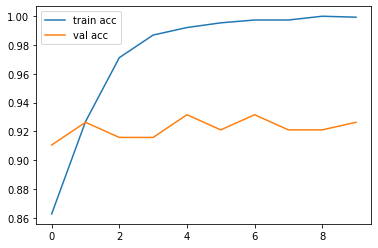

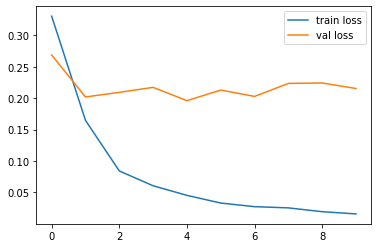

In [21]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig(r"C:\Users\vemul\Desktop\VINTERN\vintern_model\data\valid\test\Fire\fire-824.225677875.png")

plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig(r"C:\Users\vemul\Desktop\VINTERN\vintern_model\data\valid\test\Fire\fire-824.225677875.png")
plt.show()

In [22]:
model.evaluate(test_x,test_y,batch_size=32)

7/7 [==============================] - 21s 3s/step - loss: 0.1711 - accuracy: 0.9381


[0.171062171459198, 0.938144326210022]

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

7/7 [==============================] - 22s 3s/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        92
           1       0.96      0.92      0.94       102

    accuracy                           0.94       194
   macro avg       0.94      0.94      0.94       194
weighted avg       0.94      0.94      0.94       194

[[88  4]
 [ 8 94]]


In [25]:
print(accuracy_score(test_y,y_pred)*100)

93.81443298969072


In [26]:
model.save('forest_fire.h5')